<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de clientes

Crear un modelo de segmentación para la estimación de los tipos de clientes que van de compras a un shoping<br>
v1.1

In [18]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [19]:
if os.access('Mall_Customers.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv > Mall_Customers.csv
    else:
        !wget Mall_Customers.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv

### `Mall_Customers.csv`:
El dataset **`Mall_Customers.csv`** contiene datos sobre clientes que asisten al shopping a comprar, y sus características de consumo.<br>
[Dataset source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **CustomerID** --> id del comprador, ejemplo 5
- **Gender** --> género, masculino (Male) o femenino (female)
- **Age** --> edad
- **Annual Income** --> ingreso de dinero anual de la persona en miles de dolares
- **Spending socre** --> que tan gastador es la persona (de 1 a 100)

In [20]:
df = pd.read_csv("Mall_Customers.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [21]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
# Alumno: Los algoritmos de clustering no funcionan bien con las variables categóricas, 
# obtener un nuevo dataset (df2) sin la columna CustomerID y Gender
df2=df.drop(['CustomerID', 'Gender'], axis=1)

In [23]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des=df2.describe()
des.loc['Nan']=df2.isna().sum()
des.loc['%Nan']=(df2.isna().mean())*100
des

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000
Nan,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000


In [24]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
df2.shape[0]

200

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

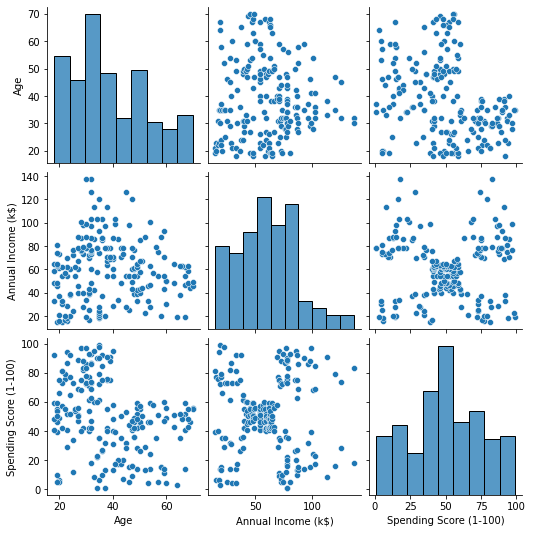

In [25]:
# Observar todas las relaciones entre todos los features, utilizar pairplot
sns.pairplot(df2)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

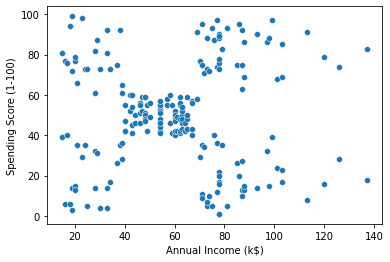

In [26]:
# Alumno: Se puede observar que donde se ve claramente una segmentación de grupos
# en en la relación de "Annual Income" y "Spending Socre"
# Graficar unicamente la relación x=Annual Income con y=SpendingScore
# con un scatter plot
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)')

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [43]:
# Almuno: Crear un numpy array "X" con los features de entrada (Annual Income y Spending Score)
df3=df2.drop(['Age'], axis=1)
X=df3.values

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [56]:
# Almuno: Entrenar diferentes modelos de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def find_best_model(X, max_clusters=10):
    n_clusters=list(range(2, max_clusters+1))
    ensayos=len(n_clusters)
    
    ssd = np.zeros((ensayos))
    score = np.zeros((ensayos))
    
    for i in range(ensayos):
        kmeans= KMeans(n_clusters=n_clusters[i], init='k-means++', random_state=0)
        kmeans.fit(X)
        ssd[i] = kmeans.inertia_
        score[i] = silhouette_score(X, kmeans.labels_)
        
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(n_clusters, ssd/ssd.max(), label='error')
    ax.plot(n_clusters, score, label='score')
    ax.grid('dashed')
    ax.legend()
    plt.show()
    best_cluster = n_clusters[score.argmax()]
    print('El mejor resultado se consigue con', best_cluster, 'clusters')
    return best_cluster
        

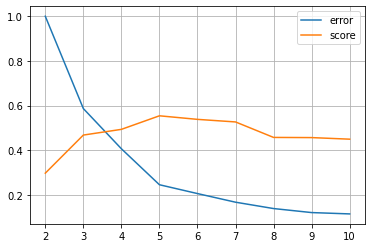

El mejor resultado se consigue con 5 clusters


In [57]:
# Dibujar la evolucion del error (inertia) y deteminar el 
# punto de quiebre (elbow point) para deteminar el mejor k
best_cluster = find_best_model(X)

In [68]:
# Alumno: Entrenar el modelo con el mejor "K" encontrado
# y determinar los labels
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

In [69]:
# Alumno: Sumar la columna de labels con el nombre de custseg (customer segmentation)
# a su dataset
df3['custseg']=labels

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [70]:
# Alumno: Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import silhouette_score
silhouette_score (X, kmeans.labels_)

0.553931997444648

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

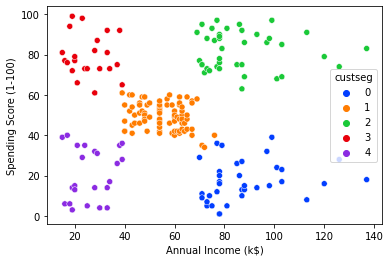

In [71]:
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg
sns.scatterplot(data=df3, x='Annual Income (k$)', y='Spending Score (1-100)', hue='custseg', palette='bright')